#Redes Neuronales Convulucionales

4.Desplegar para el siguiente caso de estudio un modelo de Deep learning con redes neuronales convolucionales.

-Es importante mencionar que para este caso debe desplegar una arquitectura propia para la red neuronal convolucional.
-Por otra parte, debe desplegar por lo menos 5 arquitecturas vistas en clase para el caso de estudio
Caso de estudio: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/data

In [46]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory ='/content/drive/MyDrive/Butterfly'

In [4]:
IMG_SIZE = (160,160)
BATCH_SIZE = 32

In [5]:
train_dataset = image_dataset_from_directory(directory=directory,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='training')

test_dataset = image_dataset_from_directory(directory=directory, shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=24,validation_split=0.2,subset='validation')

Found 5538 files belonging to 2 classes.
Using 4431 files for training.
Found 5538 files belonging to 2 classes.
Using 1107 files for validation.


In [6]:
class_names = train_dataset.class_names

In [7]:
print(class_names)

['test', 'train']


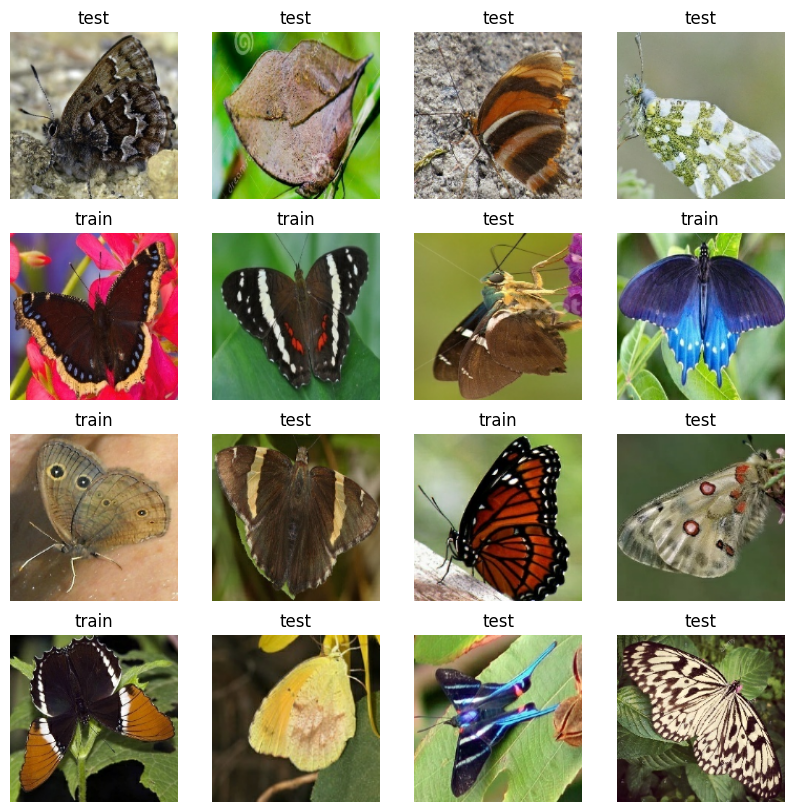

In [48]:
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


plt.show()


In [9]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.3),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomFlip('horizontal'),
])

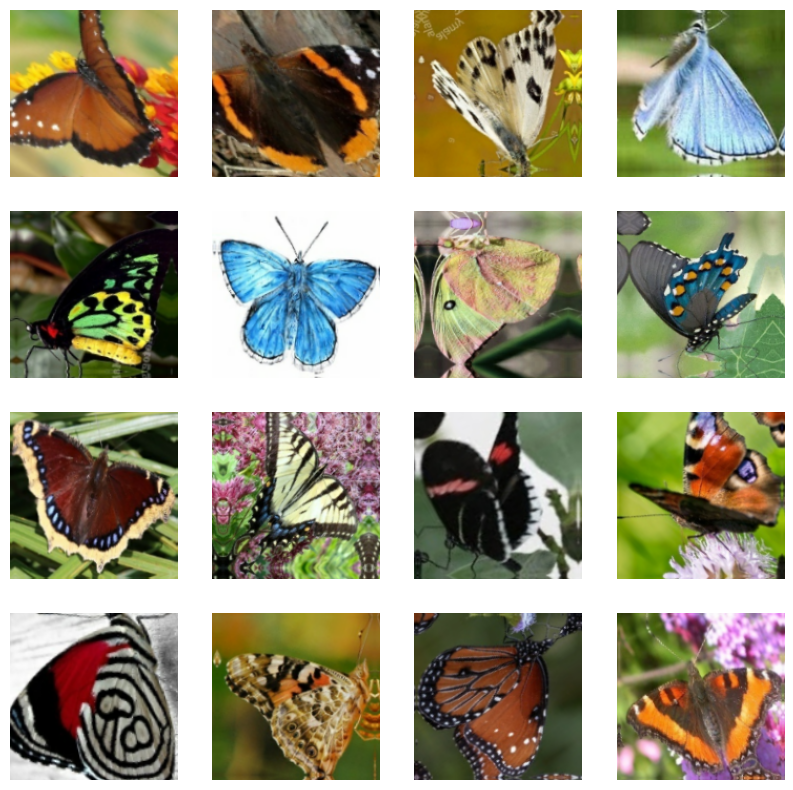

In [10]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(16):
    img_augmented = data_augmentation(images)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img_augmented[i].numpy().astype('uint8'))
    plt.axis('off')

plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes=2

In [13]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    Conv2D(32,3,strides=2,padding='same',activation='relu',input_shape=(160,160,3)),
    MaxPooling2D(),
    Conv2D(64,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
model.fit(train_dataset,validation_data=test_dataset,epochs=8)

Epoch 1/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 65s 468ms/step - accuracy: 0.5116 - loss: 0.6931 - val_accuracy: 0.4770 - val_loss: 0.6934
Epoch 2/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 83s 473ms/step - accuracy: 0.5161 - loss: 0.6929 - val_accuracy: 0.4770 - val_loss: 0.6936
Epoch 3/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 81s 465ms/step - accuracy: 0.5150 - loss: 0.6929 - val_accuracy: 0.4770 - val_loss: 0.6938
Epoch 4/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 83s 471ms/step - accuracy: 0.5156 - loss: 0.6928 - val_accuracy: 0.4770 - val_loss: 0.6937
Epoch 5/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 81s 460ms/step - accuracy: 0.5138 - loss: 0.6929 - val_accuracy: 0.4770 - val_loss: 0.6938
Epoch 6/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 87s 500ms/step - accuracy: 0.5130 - loss: 0.6929 - val_accuracy: 0.4770 - val_loss: 0.6940
Epoch 7/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 76s 460ms/step - accuracy: 0.5115 - loss: 0.6930 - val_accuracy: 0.4770 - val_loss: 0.6939
Epoch 8/8
139/139 ━━━━━━━━━━━━━━━━━━━━ 87s 499ms/step - accuracy: 0.5119 - loss: 0.6929 - 

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,876 (597.18 KB)

 Trainable params: 50,958 (199.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,918 (398.12 KB)

In [30]:
model.evaluate(test_dataset)

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.4998 - loss: 0.6932


[0.693832516670227, 0.4769647717475891]

In [31]:
predicciones = model.predict(test_dataset)

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step


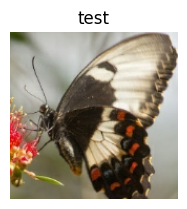

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Esta imagen es más probable a petener a test con a 50.68 porcentaje de confianza


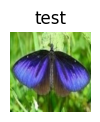

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Esta imagen es más probable a petener a test con a 50.67 porcentaje de confianza


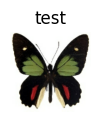

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Esta imagen es más probable a petener a test con a 50.68 porcentaje de confianza


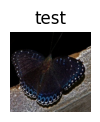

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Esta imagen es más probable a petener a test con a 50.70 porcentaje de confianza


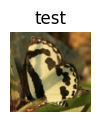

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Esta imagen es más probable a petener a test con a 50.68 porcentaje de confianza


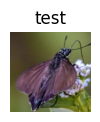

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Esta imagen es más probable a petener a test con a 50.67 porcentaje de confianza


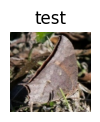

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Esta imagen es más probable a petener a test con a 50.67 porcentaje de confianza


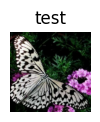

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Esta imagen es más probable a petener a test con a 50.65 porcentaje de confianza


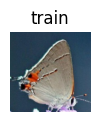

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Esta imagen es más probable a petener a test con a 50.68 porcentaje de confianza


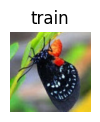

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Esta imagen es más probable a petener a test con a 50.65 porcentaje de confianza


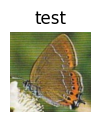

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Esta imagen es más probable a petener a test con a 50.67 porcentaje de confianza


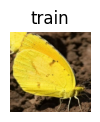

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Esta imagen es más probable a petener a test con a 50.65 porcentaje de confianza


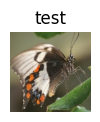

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Esta imagen es más probable a petener a test con a 50.68 porcentaje de confianza


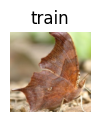

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Esta imagen es más probable a petener a test con a 50.67 porcentaje de confianza


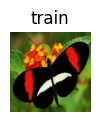

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Esta imagen es más probable a petener a test con a 50.65 porcentaje de confianza


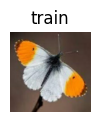

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Esta imagen es más probable a petener a test con a 50.65 porcentaje de confianza


In [32]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score)],100*tf.reduce_max(score)))

In [33]:
img_shape = IMG_SIZE + (3,)

#5 Tipos de Arquitecturas

#VGG16.1

In [34]:
arq_vgg_16 = tf.keras.applications.VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))

In [35]:
arq_vgg_16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
vgg_16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=img_shape)

In [40]:
model2 = keras.Sequential([
    vgg_16,
    Flatten(),
    Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(num_classes)
])

In [43]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model2.fit(train_dataset,validation_data=test_dataset,epochs=8)

Epoch 1/8
  3/139 ━━━━━━━━━━━━━━━━━━━━ 1:21:42 36s/step - accuracy: 0.6302 - loss: 0.6976

In [ ]:
model.evaluate(test_dataset)

In [ ]:
prediccionesvgg = model2.predict(test_dataset)

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions2 = model2.predict(img_array)
    score2 = tf.nn.softmax(predictions2[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score2)],100*tf.reduce_max(score2)))

#EfficentNetB3.2

In [ ]:
arq_eff_b3 = tf.keras.applications.EfficientNetB3(include_top=True, weights='imagenet',input_shape=(300,300,3))

In [ ]:
arq_eff_b3.summary()

In [ ]:
eff_3b = tf.keras.applications.EfficientNetB3(include_top=False,weights='imagenet',input_shape=img_shape)

In [ ]:
model3 = keras.Sequential([
    eff_3b,
    Flatten(),
    Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(num_classes)
])

In [ ]:
model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model3.fit(train_dataset,validation_data=test_dataset,epochs=10)

In [ ]:
model3.evaluate(test_dataset)

In [ ]:
prediccioneseff= model3.predict(test_dataset)

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions3 = model3.predict(img_array)
    score3 = tf.nn.softmax(predictions3[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score3)],100*tf.reduce_max(score3)))

#ResNet152.3

In [ ]:
#ResNet152

arq_resnet_152 = tf.keras.applications.ResNet152(include_top=True, weights='imagenet',input_shape=(224,224,3))

arq_resnet_152.summary()

In [ ]:
restnet_152 = tf.keras.applications.ResNet152(include_top=False, weights='imagenet', input_shape=img_shape)

In [ ]:
model4.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model4.fit(train_dataset, validation_data=test_dataset, epochs=8)

In [ ]:
model4.evaluate(test_dataset)

In [ ]:
prediccionesresnet = model4.predict(test_dataset)

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions4 = model4.predict(img_array)
    score4 = tf.nn.softmax(predictions4[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score4)],100*tf.reduce_max(score4)))

#Xception.4

In [ ]:
arq_xception = tf.keras.applications.Xception(include_top=True, weights='imagenet',input_shape=(299,299,3))

In [ ]:
arq_xception_model = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_shape=img_shape)

In [ ]:
model5.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model5.evaluate(test_dataset)

In [ ]:
prediccionesxception = model5.predict(test_dataset)

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions5 = model5.predict(img_array)
    score5 = tf.nn.softmax(predictions5[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score5)],100*tf.reduce_max(score5)))

#Nasnet architecture.5

In [ ]:
arq_nasnet = tf.keras.applications.NASNetLarge(include_top=True, weights='imagenet',input_shape=(331,331,3))

In [ ]:
arq_nasnet.summary()

In [ ]:
arq_nasnet_model = tf.keras.applications.NASNetLarge(include_top=False,weights='imagenet',input_shape=img_shape)

In [ ]:
model6 = keras.Sequential([
    arq_nasnet_model,
    Flatten(),
    Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(num_classes)
])

In [ ]:
model6.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model6.fit(train_dataset, validation_data=test_dataset, epochs=10)

In [ ]:
model6.evaluate(test_dataset)

In [ ]:
prediccionesnasnet = model6.predict(test_dataset)

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions6 = model6.predict(img_array)
    score6 = tf.nn.softmax(predictions6[0])

    print("Esta imagen es más probable a petener a {} con a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score6)],100*tf.reduce_max(score6)))